In [1]:
import os
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
from multiprocessing import Pool
import pickle

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec

from matplotlib.patches import ConnectionPatch
from scipy.stats import fisher_exact

import matplotlib.patches as mpatches
from scipy.stats import gaussian_kde, mannwhitneyu
from itertools import combinations

from scipy.stats import ks_2samp
from statsmodels.stats.multitest import multipletests

os.chdir('for_pub/Figure_5')
from Figure_5_module import *

/home/pb/anaconda3/envs/R_python/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load splicing pickled data for plotting the ORFs
# Loading
with open('data_files/all.flair.collapse.isoforms_event_label_promoter_group_data.pkl', 'rb') as file:
    promoter_group_data = pickle.load(file)

In [3]:
gtf_file_path1 = 'data_files/all.flair.collapse.isoforms_event_label_start_stop_orf.gtf'
gtf_file_path2 = 'data_files/all.flair.collapse.isoforms_event_label_start_stop_pfam_v1_1.gtf'
gtf_file_path3 = 'data_files/all.flair.collapse.isoforms_event_label.gtf'

df_pfam = pd.read_csv("data_files/pfam_start_stops.tsv",sep="\t")

gtf_data = pd.read_csv(gtf_file_path3, sep='\t',low_memory=False)
gtf_data_orf = pd.read_csv(gtf_file_path1, sep='\t',low_memory=False)
gtf_data_pfam = pd.read_csv(gtf_file_path2, sep='\t',low_memory=False)


In [4]:
results_a_vs_c_splice = load_csv_as_dataframe('data_files/results_a_vs_c_splice.csv')
results_b_vs_d_splice = load_csv_as_dataframe('data_files/results_b_vs_d_splice.csv')


#load the AS event data table
asevents = pd.read_csv("data_files/ASevents_ovary.csv",sep="\t")
asevents.set_index('ids', inplace=True)

#merge the as events with the baysian table
splice_abundace_a_vs_c = pd.merge(results_a_vs_c_splice,asevents,left_index=True,right_index=True)
splice_abundace_b_vs_d = pd.merge(results_b_vs_d_splice,asevents,left_index=True,right_index=True)



#calculate the inclusion and exclusion event numbers
splice_abundace_a_vs_c = calculate_and_add_splicing_events(splice_abundace_a_vs_c)
splice_abundace_b_vs_d = calculate_and_add_splicing_events(splice_abundace_b_vs_d)

splice_abundace_a_vs_c = add_multi_trans_column_to_data(splice_abundace_a_vs_c,gtf_data_pfam)
splice_abundace_b_vs_d = add_multi_trans_column_to_data(splice_abundace_b_vs_d,gtf_data_pfam)

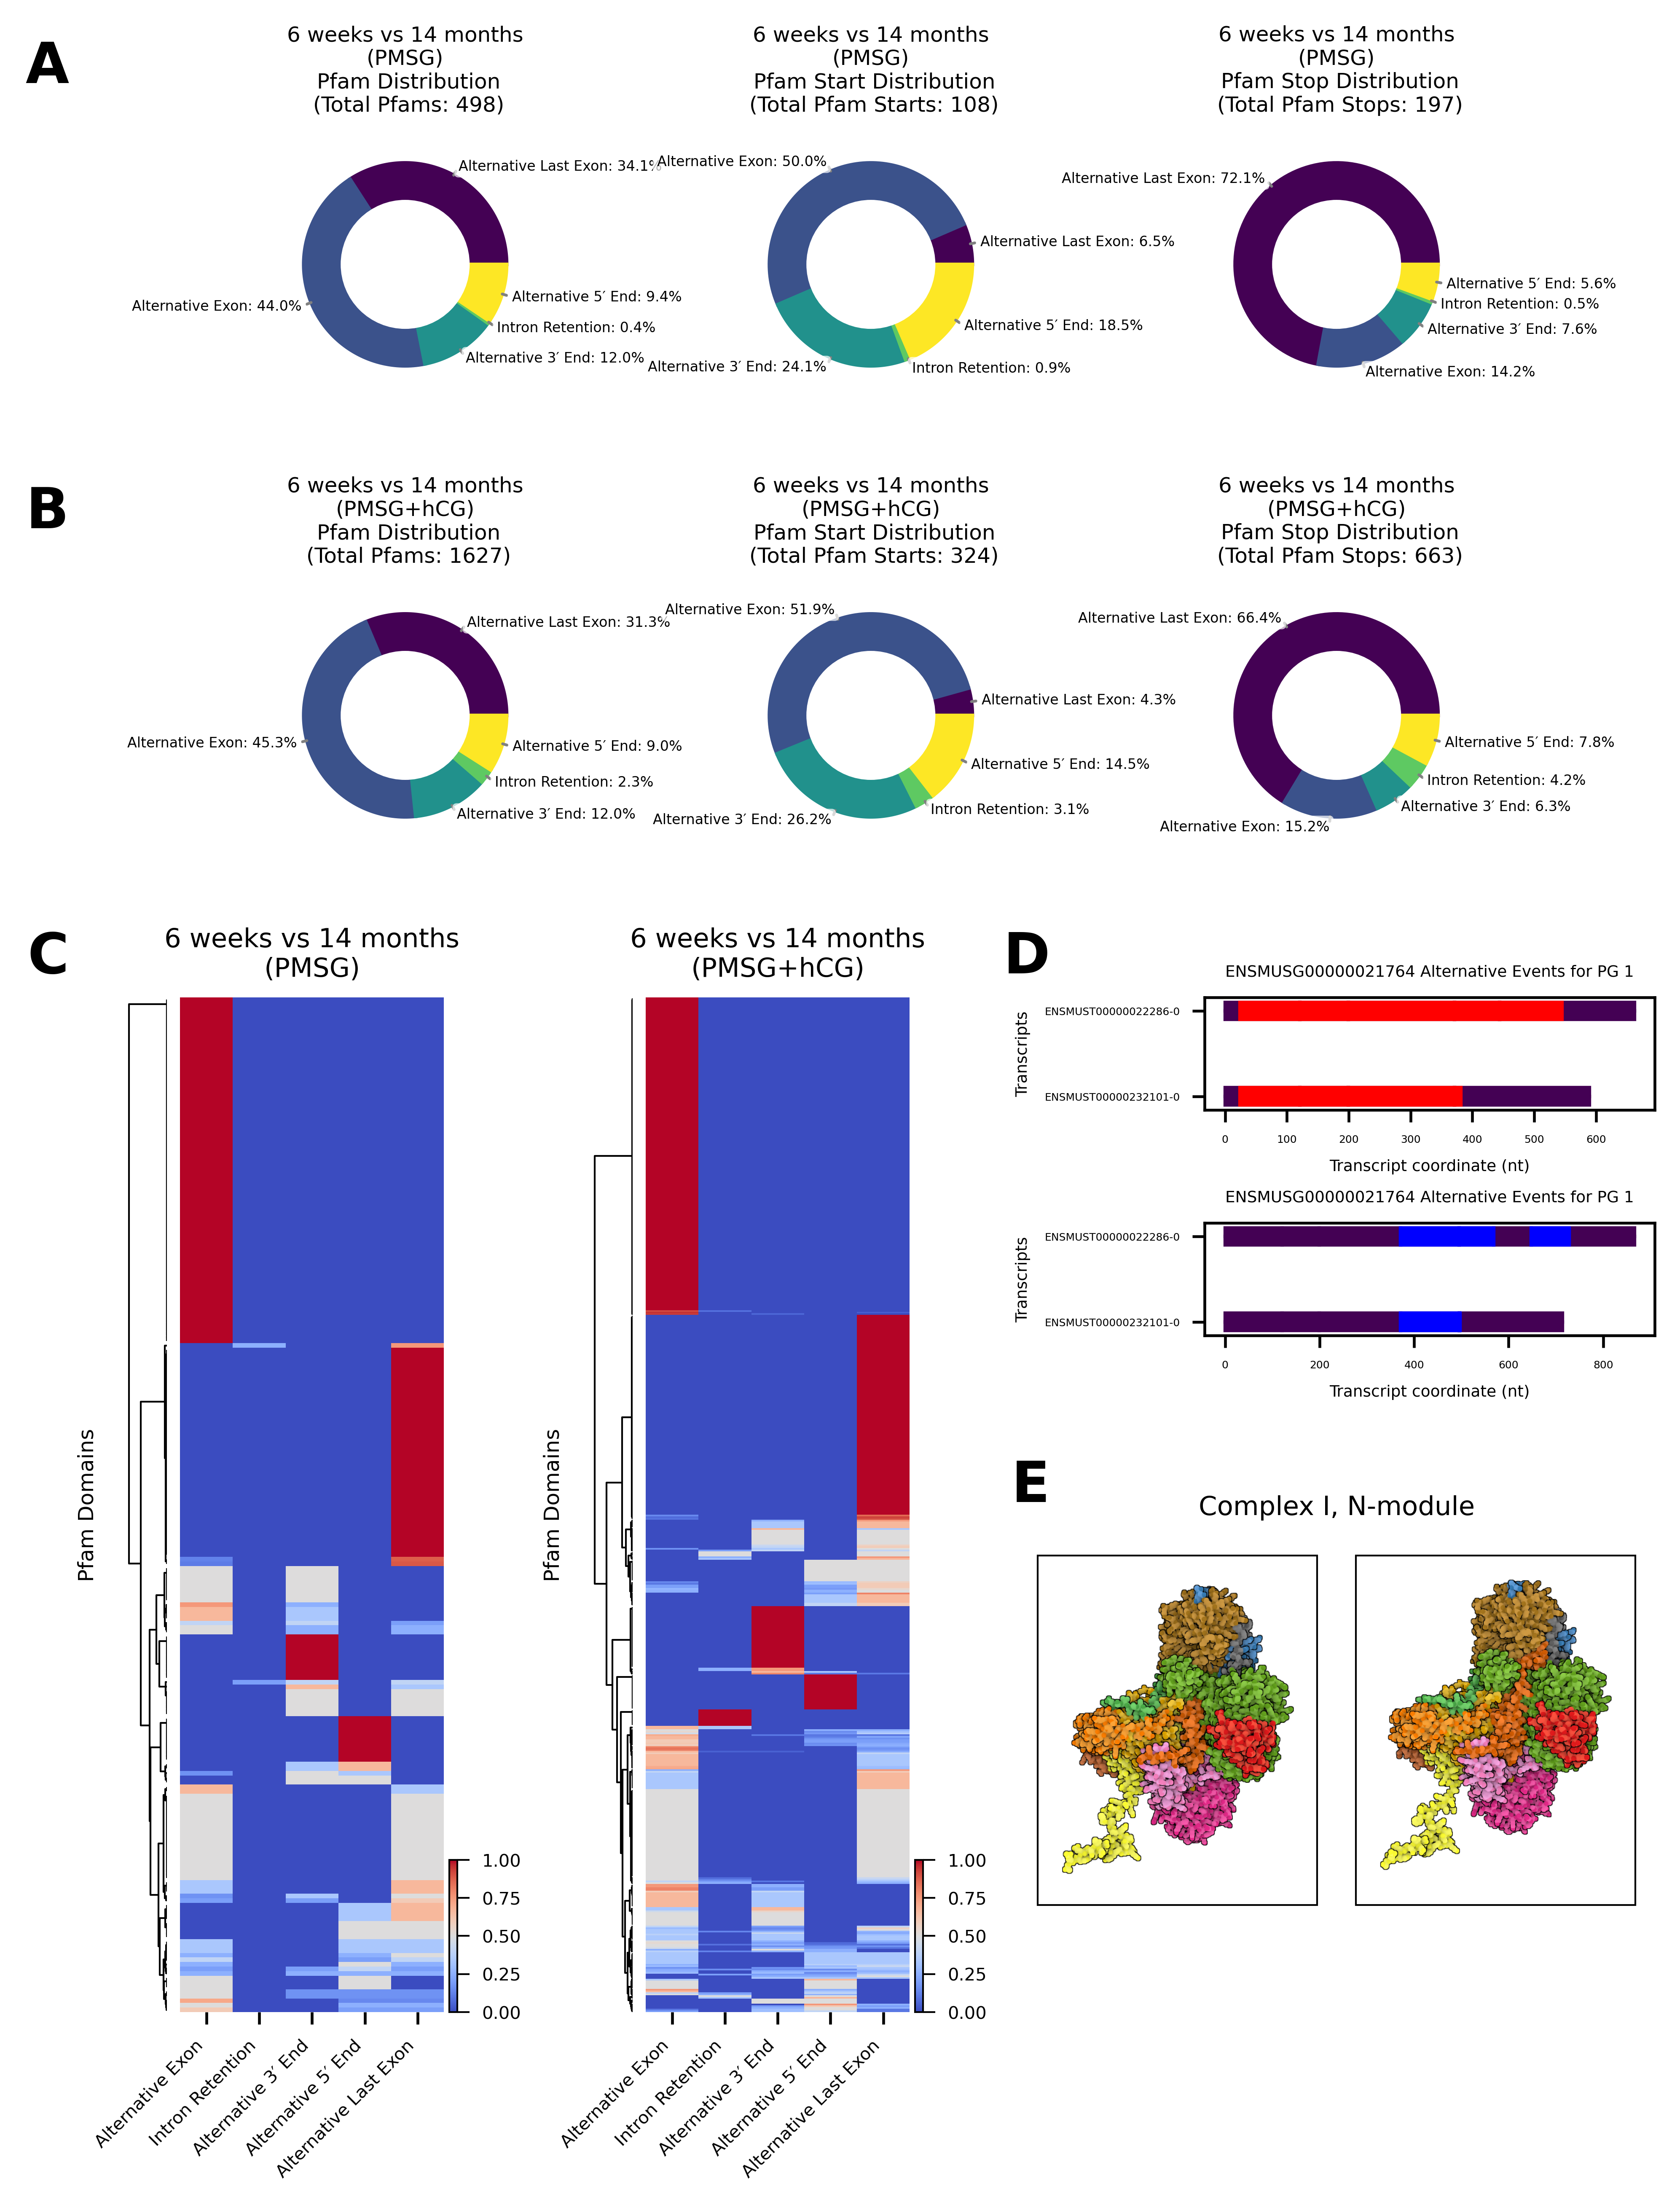

In [5]:

plt.rcParams['font.family'] = 'sans-serif'

# Prioritize 'Arial' within the 'sans-serif' font list
plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']

fig = plt.figure(figsize=(8,11),dpi=600)

# Create a GridSpec with 2 rows of different heights and 2 columns
gs = gridspec.GridSpec(10, 17, height_ratios=[1,1,1,1,1,1,1,1,1,1], hspace=1,wspace=.2, figure=fig)  # Example: [4, 1, 2] for 3 rows


# First row - two plots, each spanning two columns
#ax1_1 = fig.add_subplot(gs[0, 2:16])
ax2 = fig.add_subplot(gs[0:2, 1:4])
ax3 = fig.add_subplot(gs[2:4, 1:4])
#ax4 = fig.add_subplot(gs[1, 5:8])
ax5 = fig.add_subplot(gs[0:2, 6:9])
ax6 = fig.add_subplot(gs[2:4, 6:9])
#ax7 = fig.add_subplot(gs[3, 2:5])
#ax8 = fig.add_subplot(gs[2, 11:13])
ax9 = fig.add_subplot(gs[0:2, 11:14])
ax10 = fig.add_subplot(gs[2:4, 11:14])
ax11 = fig.add_subplot(gs[4:9, 0:3])

ax12 = fig.add_subplot(gs[4:9, 5:8])
ax13 = fig.add_subplot(gs[4:5, 11:16])
ax14 = fig.add_subplot(gs[5:6, 11:16])
ax15 = fig.add_subplot(gs[6:9, 9:16])


ac_direction = get_updown(splice_abundace_a_vs_c,"both")
bd_direction = get_updown(splice_abundace_b_vs_d,"both")


asevents_ac_stop = process_and_filter_pfam_features(gtf_data_pfam,ac_direction,filter_option='stop')
asevents_bd_stop = process_and_filter_pfam_features(gtf_data_pfam,bd_direction,filter_option='stop')
asevents_ac_start = process_and_filter_pfam_features(gtf_data_pfam,ac_direction,filter_option='start')
asevents_bd_start = process_and_filter_pfam_features(gtf_data_pfam,bd_direction,filter_option='start')
asevents_ac_pfam = process_and_filter_pfam_features(gtf_data_pfam,ac_direction)
asevents_bd_pfam = process_and_filter_pfam_features(gtf_data_pfam,bd_direction)


ac_pfam_hits = process_and_filter_pfam_features(gtf_data_pfam,ac_direction,diag=True)
ac_pfam_hits_final = annotate_pfam_hits(ac_pfam_hits, df_pfam)

bd_pfam_hits = process_and_filter_pfam_features(gtf_data_pfam,bd_direction,diag=True)
bd_pfam_hits_final = annotate_pfam_hits(bd_pfam_hits, df_pfam)


event_name = ['Alternative Exon', 'Alternative 3′ End', 'Alternative 5′ End', 'Alternative Last Exon','Intron Retention']
event_column = ['ce', 'alt3', 'alt5', 'alt_end', 'ir']
event_order = ['Alternative Last Exon','Alternative Exon', 'Alternative 3′ End', 'Intron Retention', 'Alternative 5′ End']

# Define your title

title1 = "6 weeks vs 14 months\n(PMSG)\n Pfam Distribution\n (Total Pfams"
title2 = "6 weeks vs 14 months\n(PMSG+hCG)\n Pfam Distribution\n (Total Pfams"

title3 = "6 weeks vs 14 months\n(PMSG)\n Pfam Start Distribution\n (Total Pfam Starts"
title4 = "6 weeks vs 14 months\n(PMSG+hCG)\n Pfam Start Distribution\n (Total Pfam Starts"


title5 = "6 weeks vs 14 months\n(PMSG)\n Pfam Stop Distribution\n (Total Pfam Stops"
title6 = "6 weeks vs 14 months\n(PMSG+hCG)\n Pfam Stop Distribution\n (Total Pfam Stops"

title7 = "6 weeks vs 14 months\n(PMSG)\n Pfam Event Distribution\n (Total Events spanning Pfams"
title8 = "6 weeks vs 14 months\n(PMSG+hCG)\n Pfam Event Distribution\n (Total Events spanning Pfams"




# Call the corrected custom_pie_v4 function
custom_pie_v4(
    asevents=asevents_ac_pfam,
    title=title1,
    events='splice',
    event_name = event_name,         #custom event names 
    event_column = event_column,     #custom column names
    table_name='figure_files/pfam_by_splicing_a_vs_c_fig5_a_left.csv',  # Optional: specify your desired table name
    event_order=event_order,                 # Optional: specify a custom order if needed
    innerauto=False,                  # Disable inner labels for clarity
    outerauto=True,                   # Enable outer labels with leader lines
    innerman=False,                   # Do not manually place inner labels
    outerman=False,                   # Do not manually place outer labels
    legend=False,                      # Add a legend
    inner_pad=0.7,                    # Padding for inner labels (unused if innerauto=False)
    outer_pad=1.1,                    # Increased padding for outer labels
    fscale=4,
    axvis=False,                      # Hide axis
    ax=ax2,                          # Let the function create a new Axes
    table=True                       # Do not save the table as a CSV
)

# Call the corrected custom_pie_v4 function
custom_pie_v4(
    asevents=asevents_bd_pfam,
    title=title2,
    events='splice',
    event_name = event_name,         #custom event names 
    event_column = event_column,     #custom column names
    table_name='figure_files/pfam_by_splicing_b_vs_d_fig5_b_left.csv',  # Optional: specify your desired table name
    event_order=event_order,                 # Optional: specify a custom order if needed
    innerauto=False,                  # Disable inner labels for clarity
    outerauto=True,                   # Enable outer labels with leader lines
    innerman=False,                   # Do not manually place inner labels
    outerman=False,                   # Do not manually place outer labels
    legend=False,                      # Add a legend
    inner_pad=0.7,                    # Padding for inner labels (unused if innerauto=False)
    outer_pad=1.1,                    # Increased padding for outer labels
    fscale=4,
    axvis=False,                      # Hide axis
    ax=ax3,                          # Let the function create a new Axes
    table=True                       # Do not save the table as a CSV
)

# Call the corrected custom_pie_v4 function
custom_pie_v4(
    asevents=asevents_ac_start,
    title=title3,
    events='splice',
    event_name = event_name,         #custom event names 
    event_column = event_column,     #custom column names
    table_name='figure_files/pfam_by_splicing_a_vs_c_fig5_a_middle.csv',  # Optional: specify your desired table name
    event_order=event_order,                 # Optional: specify a custom order if needed
    innerauto=False,                  # Disable inner labels for clarity
    outerauto=True,                   # Enable outer labels with leader lines
    innerman=False,                   # Do not manually place inner labels
    outerman=False,                   # Do not manually place outer labels
    legend=False,                      # Add a legend
    inner_pad=0.7,                    # Padding for inner labels (unused if innerauto=False)
    outer_pad=1.1,                    # Increased padding for outer labels
    fscale=4,
    axvis=False,                      # Hide axis
    ax=ax5,                          # Let the function create a new Axes
    table=True                       # Do not save the table as a CSV
)

# Call the corrected custom_pie_v4 function
custom_pie_v4(
    asevents=asevents_bd_start,
    title=title4,
    events='splice',
    event_name = event_name,         #custom event names 
    event_column = event_column,     #custom column names
    table_name='figure_files/pfam_by_splicing_b_vs_d_fig5_b_middle.csv',  # Optional: specify your desired table name
    event_order=event_order,                 # Optional: specify a custom order if needed
    innerauto=False,                  # Disable inner labels for clarity
    outerauto=True,                   # Enable outer labels with leader lines
    innerman=False,                   # Do not manually place inner labels
    outerman=False,                   # Do not manually place outer labels
    legend=False,                      # Add a legend
    inner_pad=0.7,                    # Padding for inner labels (unused if innerauto=False)
    outer_pad=1.1,                    # Increased padding for outer labels
    fscale=4,
    axvis=False,                      # Hide axis
    ax=ax6,                          # Let the function create a new Axes
    table=True                       # Do not save the table as a CSV
)


# Call the corrected custom_pie_v4 function
custom_pie_v4(
    asevents=asevents_ac_stop,
    title=title5,
    events='splice',
    event_name = event_name,         #custom event names 
    event_column = event_column,     #custom column names
    table_name='figure_files/pfam_by_splicing_a_vs_c_fig5_a_right.csv',  # Optional: specify your desired table name
    event_order=event_order,                 # Optional: specify a custom order if needed
    innerauto=False,                  # Disable inner labels for clarity
    outerauto=True,                   # Enable outer labels with leader lines
    innerman=False,                   # Do not manually place inner labels
    outerman=False,                   # Do not manually place outer labels
    legend=False,                      # Add a legend
    inner_pad=0.7,                    # Padding for inner labels (unused if innerauto=False)
    outer_pad=1.1,                    # Increased padding for outer labels
    fscale=4,
    axvis=False,                      # Hide axis
    ax=ax9,                          # Let the function create a new Axes
    table=True                       # Do not save the table as a CSV
)

# Call the corrected custom_pie_v4 function
custom_pie_v4(
    asevents=asevents_bd_stop,
    title=title6,
    events='splice',
    event_name = event_name,         #custom event names 
    event_column = event_column,     #custom column names
    table_name='figure_files/pfam_by_splicing_b_vs_d_fig5_b_right.csv',  # Optional: specify your desired table name
    event_order=event_order,                 # Optional: specify a custom order if needed
    innerauto=False,                  # Disable inner labels for clarity
    outerauto=True,                   # Enable outer labels with leader lines
    innerman=False,                   # Do not manually place inner labels
    outerman=False,                   # Do not manually place outer labels
    legend=False,                      # Add a legend
    inner_pad=0.7,                    # Padding for inner labels (unused if innerauto=False)
    outer_pad=1.1,                    # Increased padding for outer labels
    fscale=4,
    axvis=False,                      # Hide axis
    ax=ax10,                          # Let the function create a new Axes
    table=True                       # Do not save the table as a CSV
)


plot_clustered_heatmap_v2(
    dataframe=ac_pfam_hits_final,
    event_name=['Alternative Exon', 'Alternative 3′ End', 'Alternative 5′ End', 'Alternative Last Exon', 'Intron Retention'],
    event_column=['ce', 'alt3', 'alt5', 'alt_end', 'ir'],
    event_order=['Alternative Exon', 'Intron Retention', 'Alternative 3′ End', 'Alternative 5′ End', 'Alternative Last Exon'],
    title="6 weeks vs 14 months\n(PMSG)",
    fscale = 5,
    ax_main=ax11,
    export_tsv=True,
    tsv_filename="figure_files/Fig5C_left_pmsg_heatmap_data_normalized.tsv"
)

plot_clustered_heatmap_v2(
    dataframe=bd_pfam_hits_final,
    event_name=['Alternative Exon', 'Alternative 3′ End', 'Alternative 5′ End', 'Alternative Last Exon', 'Intron Retention'],
    event_column=['ce', 'alt3', 'alt5', 'alt_end', 'ir'],
    event_order=['Alternative Exon', 'Intron Retention', 'Alternative 3′ End', 'Alternative 5′ End', 'Alternative Last Exon'],
    title="6 weeks vs 14 months\n(PMSG+hCG)",
    fscale = 5,
    ax_main=ax12,
    export_tsv=True,
    tsv_filename="figure_files/Fig5C_right_pmsg_hcg_heatmap_data_normalized.tsv"
)


gene_id = 'ENSMUSG00000021764'
promoter_group_data_slice = find_all_promoter_groups_by_gene_id(promoter_group_data,gene_id)
#Specify the promoter group ID you want to plot
promoter_group_id_to_plot = 1

plot_promoter_group_v2(
    promoter_group_data=promoter_group_data_slice,
    promoter_group_id_to_plot=promoter_group_id_to_plot,
    gtf_data=gtf_data_orf,
    gene_id=gene_id,
    ax_ae=ax13,       # Plot alternative events on ax1
    ax_cov=None,      # Plot coverage on ax2
    asplot=True,
    covplot=False,
    fscale1=3,
    fscale2=3,
    hide_xtick=False,
    transcript_space=True
)


plot_promoter_group_v2(
    promoter_group_data=promoter_group_data_slice,
    promoter_group_id_to_plot=promoter_group_id_to_plot,
    gtf_data=gtf_data_pfam,
    gene_id=gene_id,
    ax_ae=ax14,       # Plot alternative events on ax1
    ax_cov=None,      # Plot coverage on ax2
    asplot=True,
    covplot=False,
    fscale1=3,
    fscale2=3,
    hide_xtick=False,
    transcript_space=True
)


# Load images
img1_path = "data_files/alphafold/shortNdufs4.png"
img2_path = "data_files/alphafold/Full_lengthNdufs4.png"

plot_protein_variants(ax15, img1_path, img2_path, "Complex I, N-module",fscale=5)

# Define the splicing event types
splicing_types = ['Alternative Exon', 'Alternative 5′ End', 'Alternative 3′ End', 'Intron Retention', 'Alternative Last Exon']
#splicing_types = ['Alternative Exon', 'Alternative 5′ End', 'Alternative 3′ End', 'Intron Retention', 'Alternative Last Exon']
# Initialize results dictionary
chi2_results_all_types = {'Panel left': {}, 'Panel mid': {}, 'Panel right': {}}

# Perform chi-squared test for each splicing event type in Panel B and Panel C
for splicing_type in splicing_types:
    chi2_left, p_b = perform_chi_squared_test('figure_files/pfam_by_splicing_a_vs_c_fig5_a_left.csv', 'figure_files/pfam_by_splicing_b_vs_d_fig5_b_left.csv', splicing_type)
    chi2_mid, p_c = perform_chi_squared_test('figure_files/pfam_by_splicing_a_vs_c_fig5_a_middle.csv', 'figure_files/pfam_by_splicing_b_vs_d_fig5_b_middle.csv', splicing_type)
    chi2_right, p_d = perform_chi_squared_test('figure_files/pfam_by_splicing_a_vs_c_fig5_a_right.csv', 'figure_files/pfam_by_splicing_b_vs_d_fig5_b_right.csv', splicing_type)
    
    chi2_results_all_types['Panel left'][splicing_type] = (chi2_left, p_b)
    chi2_results_all_types['Panel mid'][splicing_type] = (chi2_mid, p_c)
    chi2_results_all_types['Panel right'][splicing_type] = (chi2_right, p_d)

    

# Convert results to DataFrame
chi2_results_df = pd.DataFrame(chi2_results_all_types).T.applymap(lambda x: f"{x[0]:.5f}, {x[1]:.5e}")

chi2_results_df
chi2_results_df.to_csv("figure_files/fig5_a_b_chi_results.tsv",sep="\t")


fig.text(0.07, 0.9, 'A', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.07, 0.74, 'B', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.07, 0.58, 'C', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.555, 0.58, 'D', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.555, 0.39, 'E', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
#fig.text(0.07, 0.475, 'F', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)


fig.savefig('figure_files/Figure_5.png', dpi=600)
fig.savefig('figure_files/Figure_5.pdf', dpi=600)
plt.show()
